# 302 Classification


In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
torch.manual_seed(1)    # reproducible

In [2]:
# make fake data
n_data = torch.ones(100, 2)#100行2列的1

In [3]:
#torch.normal(means, std, out=None)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, 1)

In [4]:
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating 增加行
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer

In [5]:
import numpy as np
a = x.data.numpy()[:,0]
a_ = np.array(a)
a_.shape

(200,)

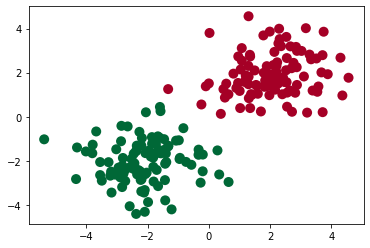

In [6]:
# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)#x的第一列是横坐标，第二列是纵坐标

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy()
            , s=100#点更粗大
            , lw=0
            , cmap='RdYlGn')
plt.show()

In [19]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.out(x)
        return x

In [20]:
net = Net(n_feature=2, n_hidden=10, n_output=2)     # define the network
print(net)  # net architecture

# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


In [9]:
plt.ion()   # something about plotting

In [21]:
out = net(x)                 # input x and predict based on x
loss = loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

optimizer.zero_grad()   # clear gradients for next train
loss.backward()         # backpropagation, compute gradients
optimizer.step()        # apply gradients

In [22]:
#output = torch.max(input, dim)
#input是softmax函数输出的一个tensor
#dim是max函数索引的维度0/1，0是每列的最大值，1是每行的最大值
#函数会返回两个tensor，第一个tensor是每行的最大值；第二个tensor是每行最大值的索引(dim = 1)
torch.max(torch.softmax(out,1), 1)#F.softmax默认按行进行softmax，一般都用行


torch.return_types.max(
values=tensor([0.5154, 0.5583, 0.5409, 0.5582, 0.5113, 0.5111, 0.5592, 0.5083, 0.5483,
        0.5208, 0.5164, 0.5317, 0.5107, 0.5105, 0.5385, 0.5055, 0.5100, 0.5362,
        0.5241, 0.5360, 0.5070, 0.5197, 0.5353, 0.5013, 0.5265, 0.5382, 0.5189,
        0.5393, 0.5177, 0.5405, 0.5001, 0.5948, 0.5413, 0.5449, 0.5175, 0.5046,
        0.5099, 0.5300, 0.5322, 0.5302, 0.5022, 0.5283, 0.5068, 0.5307, 0.5333,
        0.5372, 0.5143, 0.5605, 0.5138, 0.5190, 0.5039, 0.5508, 0.5036, 0.5250,
        0.5077, 0.5297, 0.5171, 0.5047, 0.5146, 0.5259, 0.5329, 0.5618, 0.6031,
        0.5106, 0.5223, 0.5239, 0.5493, 0.5237, 0.5343, 0.5080, 0.5218, 0.5190,
        0.5268, 0.5011, 0.5275, 0.5267, 0.5257, 0.5329, 0.5132, 0.6063, 0.5287,
        0.5165, 0.5434, 0.5024, 0.5401, 0.5015, 0.5471, 0.5244, 0.5068, 0.5395,
        0.5101, 0.5310, 0.5073, 0.5067, 0.5064, 0.5062, 0.5262, 0.5219, 0.5258,
        0.5339, 0.6296, 0.6738, 0.6108, 0.6478, 0.7467, 0.5957, 0.6454, 0.6083,
        0

In [13]:
_, prediction = torch.max(F.softmax(out), 1)

<ipython-input-13-1b2faefbba87>:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  _, prediction = torch.max(F.softmax(out), 1)


In [14]:
prediction.data.numpy().shape

(200,)

In [15]:
pred_y = prediction.data.numpy().squeeze()
#去除size为1的维度，包括行和列。当维度大于等于2时，squeeze()无作用

In [16]:
prediction.data.numpy().squeeze().shape

(200,)

In [17]:
    
if t % 10 == 0 or t in [3, 6]:
    # plot and show learning process
    plt.cla()
    _, prediction = torch.max(F.softmax(out), 1)
    pred_y = prediction.data.numpy().squeeze()
    target_y = y.data.numpy()
    plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
    accuracy = sum(pred_y == target_y)/200.
    plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
    plt.show()
    plt.pause(0.1)

NameError: name 't' is not defined

<ipython-input-18-3d9e9f760e74>:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  _, prediction = torch.max(F.softmax(out), 1)


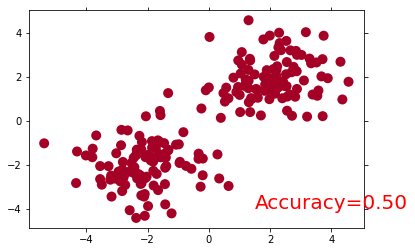

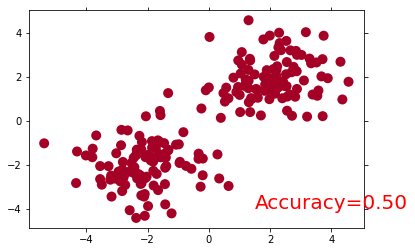

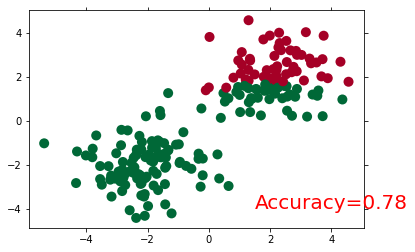

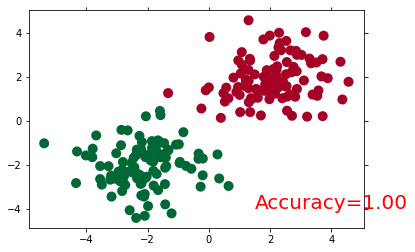

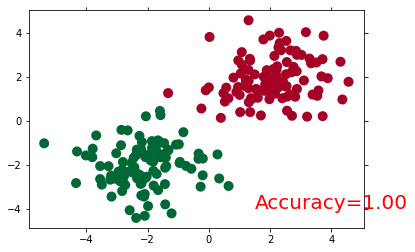

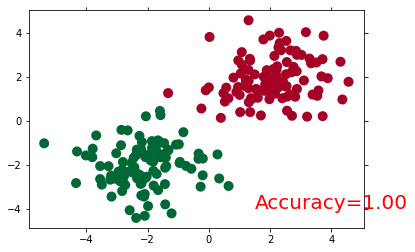

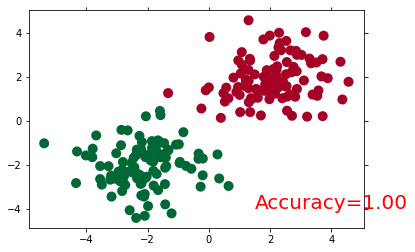

In [18]:
for t in range(50):
    out = net(x)                 # input x and predict based on x
    loss = loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    if t % 10 == 0 or t in [3, 6]:
        # plot and show learning process
        plt.cla()
        _, prediction = torch.max(F.softmax(out), 1)
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)

plt.ioff()